### t-검정의 이해
데이터를 근거로 어떤 주장이 맞는지 통계적으로 판단하는 방법

#### 기본 프로세스
1. **귀무가설(H₀)** 설정: 변화 없음, 차이 없음 (기존 상태)
2. **대립가설(H₁)** 설정: 변화 있음, 차이 있음 (우리가 증명하고 싶은 것)
3. 데이터 수집 및 검정통계량 계산
4. p-value 계산
5. 결론 도출

**p-value란?**
"귀무가설이 참이라고 가정했을 때, 현재 관측된 결과보다 극단적인 결과가 나올 확률"

- p-value가 작다 (< 0.05) → 귀무가설 하에서는 이런 일이 일어나기 어렵다 → 귀무가설 기각
- p-value가 크다 (≥ 0.05) → 귀무가설과 모순되지 않는다 → 귀무가설 채택

**t-검정의 종류**

1. **일표본 t-검정**: 표본평균이 특정 값과 다른지
2. **독립표본 t-검정**: 두 그룹의 평균이 다른지
3. **대응표본 t-검정**: 같은 대상의 전후 비교

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Mac 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [7]:
print("="*60)
print("1. 일표본 t-검정 (One-sample t-test)")
print("="*60)
print("문제: 새로운 학습법으로 공부한 학생들의 평균 점수가 80점과 다른가?")
print()

# 데이터 생성 (실제로는 85점 정도)
np.random.seed(42)
scores = np.random.normal(loc=85, scale=10, size=30)

print(f"귀무가설(H₀): 평균 점수 = 80점")
print(f"대립가설(H₁): 평균 점수 ≠ 80점")
print(f"\n표본 크기: {len(scores)}")
print(f"표본 평균: {scores.mean():.2f}점")
print(f"표본 표준편차: {scores.std(ddof=1):.2f}점")

# t-검정 수행
t_stat, p_value = stats.ttest_1samp(scores, 80)

print(f"\n=== 검정 결과 ===")
print(f"t-통계량: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"\n결론 (α=0.05): ", end="")
if p_value < 0.05:
    print(f"귀무가설 기각! 평균이 80점과 유의하게 다릅니다.")
else:
    print(f"귀무가설 채택. 평균이 80점과 다르다고 할 수 없습니다.")

1. 일표본 t-검정 (One-sample t-test)
문제: 새로운 학습법으로 공부한 학생들의 평균 점수가 80점과 다른가?

귀무가설(H₀): 평균 점수 = 80점
대립가설(H₁): 평균 점수 ≠ 80점

표본 크기: 30
표본 평균: 83.12점
표본 표준편차: 9.00점

=== 검정 결과 ===
t-통계량: 1.8979
p-value: 0.0677

결론 (α=0.05): 귀무가설 채택. 평균이 80점과 다르다고 할 수 없습니다.


In [8]:
print("\n" + "="*60)
print("2. 독립표본 t-검정 (Independent t-test)")
print("="*60)
print("문제: A반과 B반의 평균 점수에 차이가 있는가?")
print()

# 두 그룹 데이터 생성
class_A = np.random.normal(loc=75, scale=10, size=35)
class_B = np.random.normal(loc=82, scale=12, size=40)

print(f"귀무가설(H₀): A반 평균 = B반 평균")
print(f"대립가설(H₁): A반 평균 ≠ B반 평균")
print(f"\nA반 평균: {class_A.mean():.2f}점 (n={len(class_A)})")
print(f"B반 평균: {class_B.mean():.2f}점 (n={len(class_B)})")

# 독립표본 t-검정
t_stat2, p_value2 = stats.ttest_ind(class_A, class_B)

print(f"\n=== 검정 결과 ===")
print(f"t-통계량: {t_stat2:.4f}")
print(f"p-value: {p_value2:.4f}")
print(f"\n결론 (α=0.05): ", end="")
if p_value2 < 0.05:
    print(f"귀무가설 기각! 두 반의 평균에 유의한 차이가 있습니다.")
else:
    print(f"귀무가설 채택. 두 반의 평균에 차이가 있다고 할 수 없습니다.")


2. 독립표본 t-검정 (Independent t-test)
문제: A반과 B반의 평균 점수에 차이가 있는가?

귀무가설(H₀): A반 평균 = B반 평균
대립가설(H₁): A반 평균 ≠ B반 평균

A반 평균: 73.35점 (n=35)
B반 평균: 81.37점 (n=40)

=== 검정 결과 ===
t-통계량: -3.4419
p-value: 0.0010

결론 (α=0.05): 귀무가설 기각! 두 반의 평균에 유의한 차이가 있습니다.


In [10]:
print("\n" + "="*60)
print("3. 대응표본 t-검정 (Paired t-test)")
print("="*60)
print("문제: 운동 프로그램 전후 체중에 변화가 있는가?")
print()

# 전후 데이터 생성
before_weight = np.random.normal(loc=70, scale=8, size=20)
after_weight = before_weight - np.random.normal(loc=2, scale=1.5, size=20)

print(f"귀무가설(H₀): 전후 체중 차이 = 0")
print(f"대립가설(H₁): 전후 체중 차이 ≠ 0")
print(f"\n운동 전 평균: {before_weight.mean():.2f}kg")
print(f"운동 후 평균: {after_weight.mean():.2f}kg")
print(f"평균 감량: {(before_weight - after_weight).mean():.2f}kg")

# 대응표본 t-검정
t_stat3, p_value3 = stats.ttest_rel(before_weight, after_weight)

print(f"\n=== 검정 결과 ===")
print(f"t-통계량: {t_stat3:.4f}")
print(f"p-value: {p_value3:.4f}")
print(f"\n결론 (α=0.05): ", end="")
if p_value3 < 0.05:
    print(f"귀무가설 기각! 운동 프로그램이 체중 감량에 효과가 있습니다.")
else:
    print(f"귀무가설 채택. 운동 프로그램 효과가 있다고 할 수 없습니다.")


3. 대응표본 t-검정 (Paired t-test)
문제: 운동 프로그램 전후 체중에 변화가 있는가?

귀무가설(H₀): 전후 체중 차이 = 0
대립가설(H₁): 전후 체중 차이 ≠ 0

운동 전 평균: 70.68kg
운동 후 평균: 68.33kg
평균 감량: 2.35kg

=== 검정 결과 ===
t-통계량: 7.1101
p-value: 0.0000

결론 (α=0.05): 귀무가설 기각! 운동 프로그램이 체중 감량에 효과가 있습니다.


/var/folders/q4/tvykl81x2jd2r5qwc9tk8vr00000gn/T/ipykernel_2379/1072351719.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_combined, x='반', y='점수', ax=axes[1], palette=['lightblue', 'lightgreen'])


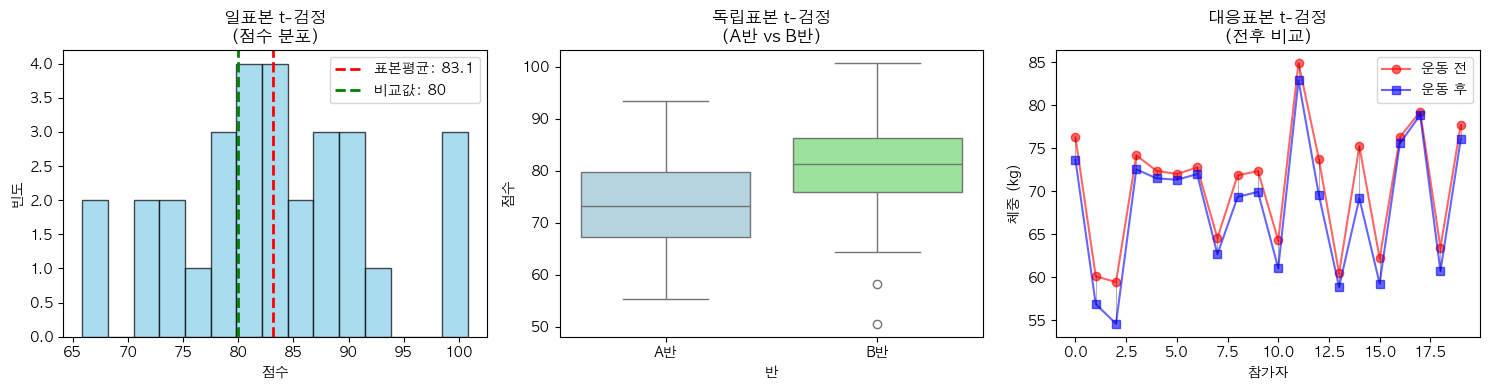

In [13]:
# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1) 일표본 t-검정 시각화
axes[0].hist(scores, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].axvline(scores.mean(), color='red', linestyle='--', linewidth=2, label=f'표본평균: {scores.mean():.1f}')
axes[0].axvline(80, color='green', linestyle='--', linewidth=2, label='비교값: 80')
axes[0].set_title('일표본 t-검정\n(점수 분포)', fontweight='bold')
axes[0].set_xlabel('점수')
axes[0].set_ylabel('빈도')
axes[0].legend()

# 2) 독립표본 t-검정 시각화
data_combined = pd.DataFrame({
    '점수': np.concatenate([class_A, class_B]),
    '반': ['A반']*len(class_A) + ['B반']*len(class_B)
})
sns.boxplot(data=data_combined, x='반', y='점수', ax=axes[1], palette=['lightblue', 'lightgreen'])
axes[1].set_title('독립표본 t-검정\n(A반 vs B반)', fontweight='bold')
axes[1].set_ylabel('점수')

# 3) 대응표본 t-검정 시각화
x_pos = np.arange(len(before_weight))
axes[2].plot(x_pos, before_weight, 'o-', color='red', alpha=0.6, label='운동 전')
axes[2].plot(x_pos, after_weight, 's-', color='blue', alpha=0.6, label='운동 후')
for i in range(len(before_weight)):
    axes[2].plot([i, i], [before_weight[i], after_weight[i]], 'k-', alpha=0.3, linewidth=0.8)
axes[2].set_title('대응표본 t-검정\n(전후 비교)', fontweight='bold')
axes[2].set_xlabel('참가자')
axes[2].set_ylabel('체중 (kg)')
axes[2].legend()

plt.tight_layout()
plt.show()

In [14]:
# 실습 문제
print("\n" + "="*60)
print("✏️ 실습 문제")
print("="*60)
print("1. 표본 크기를 10, 50, 100으로 바꾸면 p-value가 어떻게 변하나요?")
print("2. 두 그룹의 평균 차이를 줄이면 p-value가 커질까요?")
print("3. 대응표본과 독립표본 검정의 차이를 설명해보세요.")


✏️ 실습 문제
1. 표본 크기를 10, 50, 100으로 바꾸면 p-value가 어떻게 변하나요?
2. 두 그룹의 평균 차이를 줄이면 p-value가 커질까요?
3. 대응표본과 독립표본 검정의 차이를 설명해보세요.


In [32]:
# 1. 표본 크기를 10, 50, 100으로 바꾸면 p-value가 어떻게 변하나요?
np.random.seed(222)
base = np.random.normal(85, 10, 1000)

for s in [10, 50, 100]:
    scores = base[:s]  # 동일한 모집단에서 앞부분만 사용
    t_stat, p_value = stats.ttest_1samp(scores, 80)
    print(s, p_value)
# 작아지는 경향이 있다

10 0.014402903700666037
50 0.00017496892784427565
100 1.0213759639444284e-07


In [35]:
# 2. 두 그룹의 평균 차이를 줄이면 p-value가 커질까?

lst = [(0, 100), (10, 90), (20, 80), (30, 70), (40, 60), (50, 50)]

for l in lst: 
    # 두 그룹 데이터 생성
    class_A = np.random.normal(loc=l[0], scale=12, size=40)
    class_B = np.random.normal(loc=l[1], scale=12, size=40)
    # 독립표본 t-검정
    t_stat2, p_value2 = stats.ttest_ind(class_A, class_B)
    
    print(f"p-value: {p_value2:.4f}")
# 커진다

p-value: 0.0000
p-value: 0.0000
p-value: 0.0000
p-value: 0.0000
p-value: 0.0000
p-value: 0.5547
